In [1]:
!pwd

/home/tomtom/deep_learning/proj


In [12]:
from PIL import Image
import os
from pathlib import Path
import numpy as np

def load_class_visualizations(base_path, model_name):
    """
    Load class visualizations from a directory.
    
    Expected structure:
    base_path/
        model1/
            class0.png
            class1.png
            ...
        model2/
            class0.png
            class1.png
            ...
    """
    visualizations = []
    model_path = Path(base_path) / model_name
    
    # Sort files to ensure consistent ordering
    image_files = sorted(model_path.glob('*.png'))  # or '*.jpg' depending on your format
    
    for img_path in image_files:
        # Open and convert to RGB to ensure consistency
        img = Image.open(img_path).convert('RGB')
        # Convert to numpy array for matplotlib
        img_array = np.array(img)
        visualizations.append(img_array)
    
    return visualizations

# Example usage:

base_path = './class_vis/'

# Load visualizations for both models
model1_viz = load_class_visualizations(base_path, 'ijepa')
model2_viz = load_class_visualizations(base_path, 'google')

# Get class names from filenames (optional)
# class_names = [f.stem for f in sorted(Path(base_path)/'model1'.glob('*.png'))]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
print(len(model1_viz))

10


In [21]:
from PIL import Image
import os
from pathlib import Path
import numpy as np

def crop_white_borders(image):
    """Remove white borders from image."""
    # Convert to numpy array for easier processing
    img_array = np.array(image)
    
    # Get non-white pixels (assuming near-white is > 250)
    non_white = np.where(img_array.mean(axis=2) < 250)
    
    if len(non_white[0]) > 0:
        # Get bounds of non-white pixels
        top, bottom = non_white[0].min(), non_white[0].max()
        left, right = non_white[1].min(), non_white[1].max()
        
        # Crop image
        return image.crop((left, top, right + 1, bottom + 1))
    return image

def process_images(base_path, size=(224, 224)):
    """Process all images: crop white borders and resize."""
    folders = ['ijepa', 'google']
    
    for folder in folders:
        folder_path = Path(base_path) / folder
        for i in range(1, 11):
            img_path = folder_path / f'c{i}.png'
            if img_path.exists():
                # Open, crop borders, resize, and save
                img = Image.open(img_path)
                img_cropped = crop_white_borders(img)
                img_resized = img_cropped.resize(size, Image.Resampling.LANCZOS)
                img_resized.save(img_path)
                print(f'Processed {img_path}')

# Usage
process_images(base_path)

Processed class_vis/ijepa/c1.png
Processed class_vis/ijepa/c2.png
Processed class_vis/ijepa/c3.png
Processed class_vis/ijepa/c4.png
Processed class_vis/ijepa/c5.png
Processed class_vis/ijepa/c6.png
Processed class_vis/ijepa/c7.png
Processed class_vis/ijepa/c8.png
Processed class_vis/ijepa/c9.png
Processed class_vis/ijepa/c10.png
Processed class_vis/google/c1.png
Processed class_vis/google/c2.png
Processed class_vis/google/c3.png
Processed class_vis/google/c4.png
Processed class_vis/google/c5.png
Processed class_vis/google/c6.png
Processed class_vis/google/c7.png
Processed class_vis/google/c8.png
Processed class_vis/google/c9.png
Processed class_vis/google/c10.png


In [27]:
from PIL import Image
import os
from pathlib import Path

def resize_images(base_path, size=(210, 210)):
    """
    Resize all images in ijepa and google folders to the same size
    
    Args:
        base_path: Path containing ijepa and google folders
        size: Tuple of (width, height) for output images
    """
    folders = ['ijepa', 'google']
    
    for folder in folders:
        folder_path = Path(base_path) / folder
        for i in range(1, 11):  # For files c1.png through c10.png
            img_path = folder_path / f'c{i}.png'
            if img_path.exists():
                # Open, resize, and save back
                img = Image.open(img_path)
                img_resized = img.resize(size, Image.Resampling.LANCZOS)
                img_resized.save(img_path)
                print(f'Resized {img_path}')

# Usage
resize_images(base_path)

Resized class_vis/ijepa/c1.png
Resized class_vis/ijepa/c2.png
Resized class_vis/ijepa/c3.png
Resized class_vis/ijepa/c4.png
Resized class_vis/ijepa/c5.png
Resized class_vis/ijepa/c6.png
Resized class_vis/ijepa/c7.png
Resized class_vis/ijepa/c8.png
Resized class_vis/ijepa/c9.png
Resized class_vis/ijepa/c10.png
Resized class_vis/google/c1.png
Resized class_vis/google/c2.png
Resized class_vis/google/c3.png
Resized class_vis/google/c4.png
Resized class_vis/google/c5.png
Resized class_vis/google/c6.png
Resized class_vis/google/c7.png
Resized class_vis/google/c8.png
Resized class_vis/google/c9.png
Resized class_vis/google/c10.png


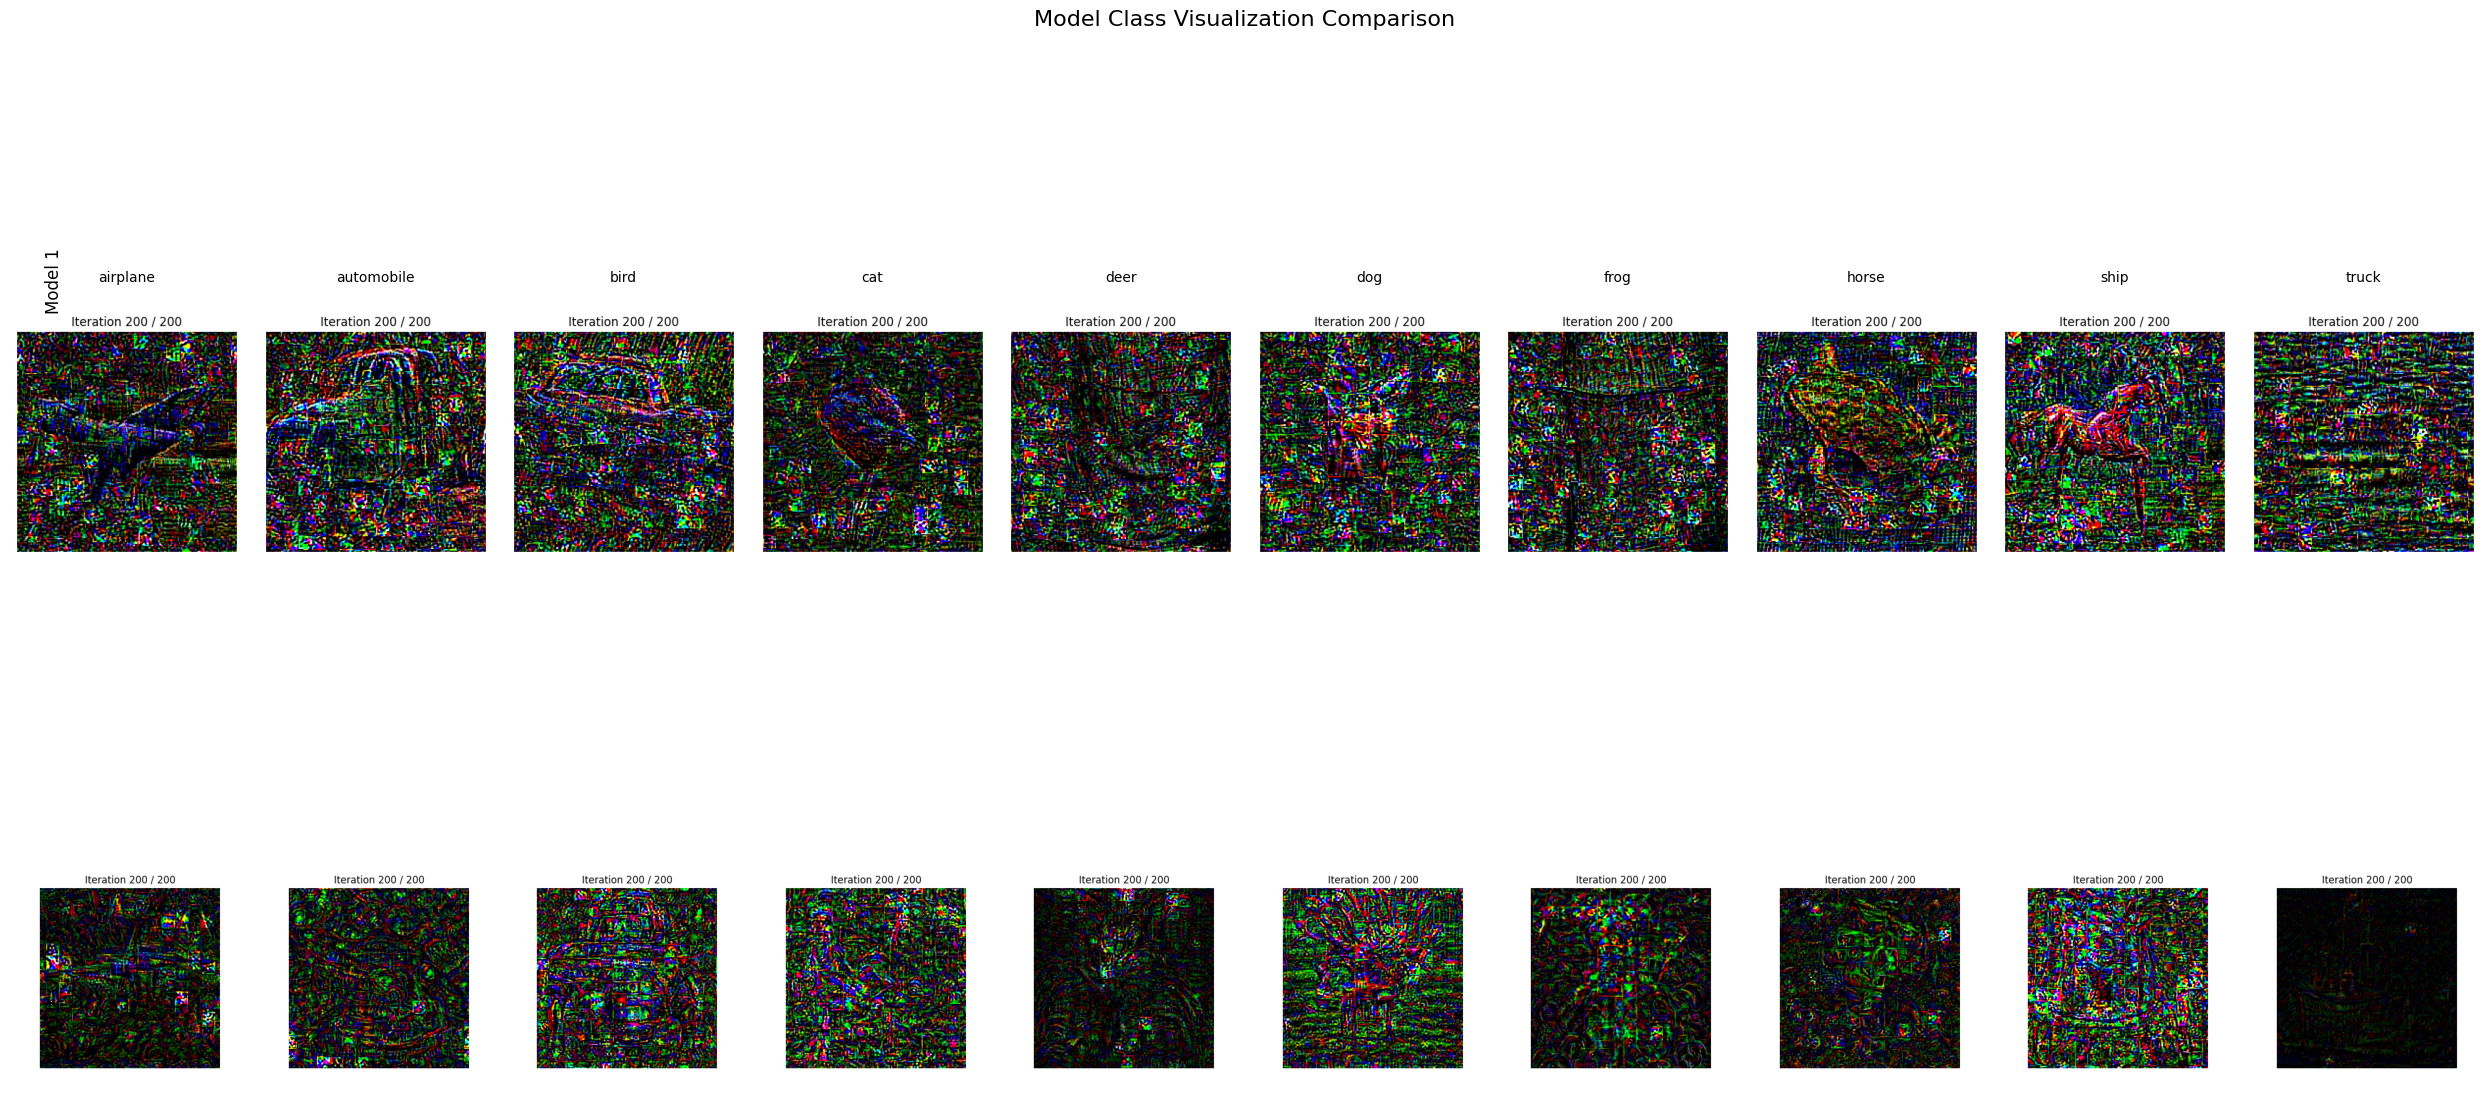

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def compare_class_visualizations(model1_viz, model2_viz, class_names=None, figsize=(25, 15)):
    """
    Compare class visualizations between two models horizontally.
    
    Parameters:
    model1_viz : list or array of images for first model
    model2_viz : list or array of images for first model
    class_names : list of class names (optional)
    figsize : tuple for figure size
    """
    assert len(model1_viz) == len(model2_viz), "Both models must have same number of classes"
    num_classes = len(model1_viz)
    
    if class_names is None:
        class_names = [f"Class {i}" for i in range(num_classes)]
    
    # Create subplot grid - now 2 rows and num_classes columns
    fig, axes = plt.subplots(2, num_classes, figsize=figsize)
    fig.suptitle('Model Class Visualization Comparison', fontsize=16, y=0.95)
    
    # Add row labels
    fig.text(0.02, 0.75, 'Model 1', fontsize=12, rotation=90)
    fig.text(0.02, 0.25, 'Model 2', fontsize=12, rotation=90)
    
    # Plot visualizations
    for idx in range(num_classes):
        # Plot Model 1
        axes[0, idx].imshow(model1_viz[idx])
        axes[0, idx].axis('off')
        axes[0, idx].set_title(class_names[idx], pad=10, fontsize=10)
        
        # Plot Model 2
        axes[1, idx].imshow(model2_viz[idx])
        axes[1, idx].axis('off')
    
    plt.tight_layout()
    return fig

# Example class names (CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Create comparison
fig = compare_class_visualizations(
    model1_viz, 
    model2_viz, 
    class_names=class_names
)

# Save the visualization
# plt.savefig('model_comparison.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

In [19]:
def generate_latex_table(base_path, num_classes=10):
    """
    Generates LaTeX code for a table comparing images with fixed sizes.
    """
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    latex_code = [
        "\\begin{table}[h]",
        "\\centering",
        "\\renewcommand{\\arraystretch}{1.2}",
        # Add fixed column widths
        "\\begin{tabular}{|p{2cm}|p{3cm}|p{3cm}|}",
        "\\hline",
        "Class & I-JEPA & Google \\\\",
        "\\hline"
    ]
    
    # Add rows for each class with fixed image sizes
    for i in range(num_classes):
        row = f"{class_names[i]} & "
        # Set both width and height to ensure uniform size
        row += f"\\includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{{ijepa/c{i+1}.png}} & "
        row += f"\\includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{{google/c{i+1}.png}} \\\\"
        latex_code.append(row)
        latex_code.append("\\hline")
    
    latex_code.extend([
        "\\end{tabular}",
        "\\caption{Class Visualization Comparison between I-JEPA and Google}",
        "\\label{tab:model_comparison}",
        "\\end{table}"
    ])
    
    return "\n".join(latex_code)

# Generate the LaTeX code
latex_table = generate_latex_table(base_path)
print(latex_table)

# Optionally save to file
with open('table.tex', 'w') as f:
    f.write(latex_table)

\begin{table}[h]
\centering
\renewcommand{\arraystretch}{1.2}
\begin{tabular}{|p{2cm}|p{3cm}|p{3cm}|}
\hline
Class & I-JEPA & Google \\
\hline
Airplane & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{ijepa/c1.png} & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{google/c1.png} \\
\hline
Automobile & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{ijepa/c2.png} & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{google/c2.png} \\
\hline
Bird & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{ijepa/c3.png} & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{google/c3.png} \\
\hline
Cat & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{ijepa/c4.png} & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{google/c4.png} \\
\hline
Deer & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{ijepa/c5.png} & \includegraphics[width=2.5cm,height=2.5cm,keepaspectratio]{google/c5.png} \\
\hline
Dog & \includegrap

In [25]:
def generate_latex_table(base_path, num_classes=10):
    """Generate LaTeX table with proper line breaks"""
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    # Each LaTeX command on a new line
    latex_code = [
        "\\begin{table}[h]",
        "\\centering",
        "\\begin{tabular}{|c|c|c|}",
        "\\hline",
        "Class & I-JEPA & Google \\\\",
        "\\hline"
    ]
    
    # Add each class row
    for i in range(10):
        row = [
            f"{class_names[i]} & ",
            f"\\includegraphics[width=3.5cm]{{ijepa/c{i+1}.png}} & ",
            f"\\includegraphics[width=3.5cm]{{google/c{i+1}.png}} \\\\"
        ]
        latex_code.append("".join(row))
        latex_code.append("\\hline")
    
    # Close the table
    latex_code.extend([
        "\\end{tabular}",
        "\\caption{Class Visualization Comparison between I-JEPA and Google}",
        "\\label{tab:model_comparison}",
        "\\end{table}"
    ])
    
    # Join with newlines
    return "\n".join(latex_code)

# Generate and write to file with proper line breaks

latex_table = generate_latex_table(base_path)
print(latex_table)
    

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|}
\hline
Class & I-JEPA & Google \\
\hline
Airplane & \includegraphics[width=3.5cm]{ijepa/c1.png} & \includegraphics[width=3.5cm]{google/c1.png} \\
\hline
Automobile & \includegraphics[width=3.5cm]{ijepa/c2.png} & \includegraphics[width=3.5cm]{google/c2.png} \\
\hline
Bird & \includegraphics[width=3.5cm]{ijepa/c3.png} & \includegraphics[width=3.5cm]{google/c3.png} \\
\hline
Cat & \includegraphics[width=3.5cm]{ijepa/c4.png} & \includegraphics[width=3.5cm]{google/c4.png} \\
\hline
Deer & \includegraphics[width=3.5cm]{ijepa/c5.png} & \includegraphics[width=3.5cm]{google/c5.png} \\
\hline
Dog & \includegraphics[width=3.5cm]{ijepa/c6.png} & \includegraphics[width=3.5cm]{google/c6.png} \\
\hline
Frog & \includegraphics[width=3.5cm]{ijepa/c7.png} & \includegraphics[width=3.5cm]{google/c7.png} \\
\hline
Horse & \includegraphics[width=3.5cm]{ijepa/c8.png} & \includegraphics[width=3.5cm]{google/c8.png} \\
\hline
Ship & \includegraphics[width=3.5